In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [19]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [21]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping...")
        

Processing record 1|sorong
Processing record 2|sioux lookout
Processing record 3|rikitea
Processing record 4|vaini
City not found. skipping...
Processing record 5|kruisfontein
Processing record 6|hazorasp
City not found. skipping...
City not found. skipping...
Processing record 7|lebu
City not found. skipping...
Processing record 8|butaritari
Processing record 9|nishihara
Processing record 10|busselton
Processing record 11|albany
Processing record 12|cape town
Processing record 13|hasaki
Processing record 14|owando
City not found. skipping...
City not found. skipping...
Processing record 15|los llanos de aridane
Processing record 16|porto novo
Processing record 17|vyazma
Processing record 18|east london
Processing record 19|puerto ayora
Processing record 20|kitui
Processing record 21|asau
Processing record 22|jamestown
Processing record 23|sola
Processing record 24|port elizabeth
Processing record 25|samarai
Processing record 26|poum
Processing record 27|saskylakh
Processing record 28|

Processing record 242|abu samrah
Processing record 243|bandarbeyla
Processing record 244|sambava
Processing record 245|bubaque
Processing record 246|manggar
Processing record 247|oxilithos
Processing record 248|mount gambier
Processing record 249|kamenka
Processing record 250|ixtapa
Processing record 251|fomboni
Processing record 252|dingle
Processing record 253|sao jose da coroa grande
Processing record 254|adwa
Processing record 255|flinders
Processing record 256|pakxan
Processing record 257|leh
Processing record 258|labuhan
Processing record 259|korla
Processing record 260|hamilton
Processing record 261|zheleznodorozhnyy
Processing record 262|tuktoyaktuk
Processing record 263|anloga
Processing record 264|abu zabad
City not found. skipping...
Processing record 265|san juan de los lagos
Processing record 266|zabol
Processing record 267|murgab
Processing record 268|auki
Processing record 269|alofi
Processing record 270|cheremisinovo
Processing record 271|ozernovskiy
City not found. ski

Processing record 491|molchanovo
Processing record 492|fairbanks
Processing record 493|nosy varika
Processing record 494|price
Processing record 495|polonnaruwa
Processing record 496|college
Processing record 497|gejiu
Processing record 498|tailai
Processing record 499|klaksvik
Processing record 500|mto wa mbu
City not found. skipping...
Processing record 501|bereda
Processing record 502|laguna
Processing record 503|comarapa
Processing record 504|riyadh
Processing record 505|sokna
City not found. skipping...
Processing record 506|ruidoso
Processing record 507|piriyapatna
Processing record 508|naryan-mar
Processing record 509|antalaha
Processing record 510|araouane
Processing record 511|vanimo
Processing record 512|aldan
Processing record 513|ikovka
Processing record 514|hindoria
City not found. skipping...
Processing record 515|airai
Processing record 516|mount isa
Processing record 517|bud
Processing record 518|springbok
Processing record 519|raduzhnyy
Processing record 520|kenai
Proc

In [23]:
# Export the city data into a .csv.
# Display the DataFrame

#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Sorong,40,ID,1650909014,84,-0.8833,131.2500,79.48,1.10
1,Sioux Lookout,100,CA,1650909015,73,50.1001,-91.9170,17.67,12.66
2,Rikitea,100,PF,1650908901,78,-23.1203,-134.9692,75.58,13.29
3,Vaini,100,TO,1650908675,94,-21.2000,-175.2000,71.76,18.41
4,Kruisfontein,55,ZA,1650908676,81,-34.0033,24.7314,57.88,6.35


-------

<b> Plotting <b>

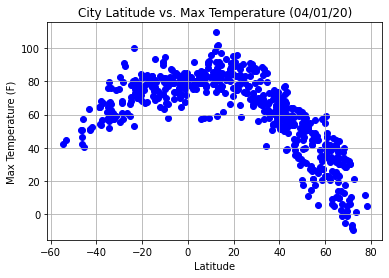

In [31]:
# Latitude vs. Temperature

plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.savefig("../output_data/Lat_vs_temp_plot")
plt.show()

Lat vs. Temp: 
This graph is proving that the closer you are to the equator, the hotter the temperature is. In April, when near the equator, the temperature can range between ~60-100 degrees (F). When moving in either direction from the equator, the temperature decreases.

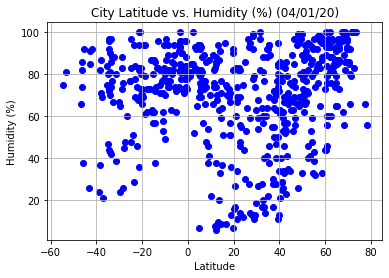

In [33]:
# Latitude vs. Humidity

plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) (04/01/20)")
plt.savefig("../output_data/Lat_vs_humidity_plot")
plt.show()

Lat vs. Humidity: At first glance there seems to be little to no correlation between humidity and latitude. But it becomes apparent that most of the data points are located above 50% humidity. This is especially true for countries located in a latitude between 40-60. It can be inferred that the higher the latitude, the more humid the country may be. 

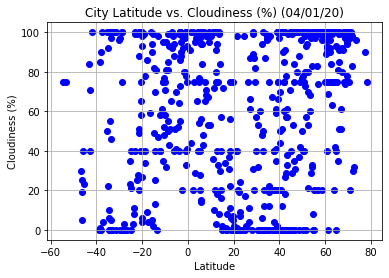

In [34]:
# Latitude vs. Cloudiness

plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (%) (04/01/20)")
plt.savefig("../output_data/Lat_vs_cloudiness_plot")
plt.show()

Lat vs. Cloudiness: Again, this graph seems to have little correlation at first, but it becomes clear that most of the data points are located at the extreme sides of cloudiness. This graph does not show how latitude can correlate with cloudiness but that many countries either have high or low cloudiness. 

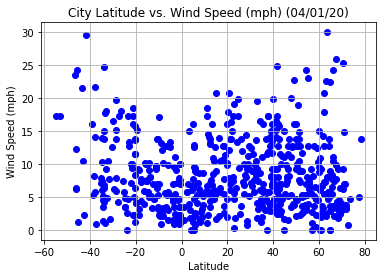

In [35]:
# Latitude vs Wind Speed

plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.savefig("../output_data/Lat_vs_windspeed_plot")
plt.show()

Lat vs. Wind Speed: Many of the countires shown in this graph seem to have low wind speeds. But, the further away one goes from the equator (in either direction), the more the wind speed increases. 

------

<b> Linear Regressions <b>

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_df.loc[city_df["Lat"]>0]
southern_hemisphere = city_df.loc[city_df["Lat"]<0]

In [40]:
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()


The r-squared is: -0.8673157807082623


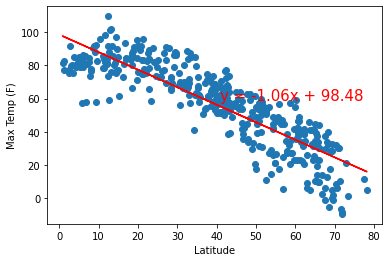

None


In [42]:
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title('Latitude vs. Temperature in the Northern Hemisphere')
print(linear_reg_plot(x_values, y_values))

This graph is showing a strong negative correlation between latitude and temperature. This means that the further away you get from the equator, the lower the temperature is. 

The r-squared is: 0.6847624416014617


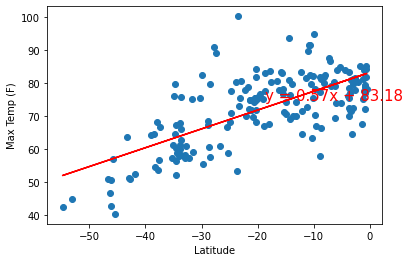

None


In [43]:
#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title('Latitude vs. Temperature in the Southern Hemisphere')
print(linear_reg_plot(x_values, y_values))

This graph shows a strong positive correltation. The closer the latitude gets to zero, the higher the temperature is. 

The r-squared is: 0.27706792851354184


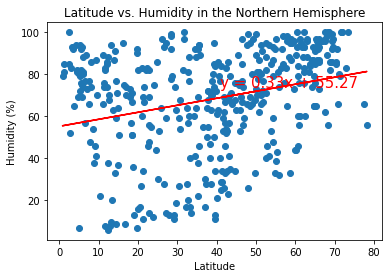

None


In [44]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title('Latitude vs. Humidity in the Northern Hemisphere')
print(linear_reg_plot(x_values, y_values))

The correlation between humidity and latitude is fairly weak, but the data is showing that the further a country gets from the equator, the more humid it may be.

The r-squared is: 0.2661182286204148


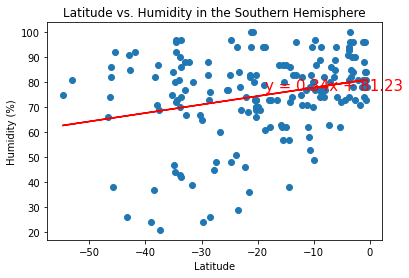

None


In [45]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title('Latitude vs. Humidity in the Southern Hemisphere')
print(linear_reg_plot(x_values, y_values))

Again, there is a weak correlation between humidity and latitude. We see here that the closer that a southern country is to the equator, the more humid it is. This is different from what we saw in the Northern Hemisphere, where the countries became more humid as they moved awayy from the equator. 

The r-squared is: 0.27806942840311893


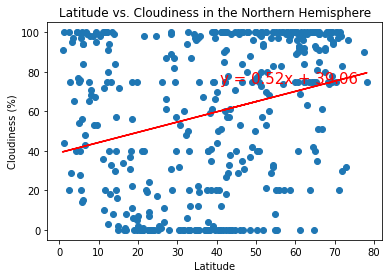

None


In [46]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title('Latitude vs. Cloudiness in the Northern Hemisphere')
print(linear_reg_plot(x_values, y_values))

We see a low correlation between cloudiness and latitude for countries in the northern hemisphere. The data shows that cloudiness slightly increases for countries further from the equator. 

The r-squared is: 0.2836731574651199


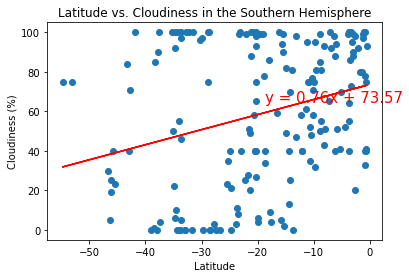

None


In [47]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
plt.title('Latitude vs. Cloudiness in the Southern Hemisphere')
print(linear_reg_plot(x_values, y_values))

This graph shows a low correlation between latitude and cloudiness for the southern hemisphere. Differing from the Northern hemisphere, countries in the lower half become more cloudy as the move towards the equator. 

The r-squared is: 0.006635289411633778


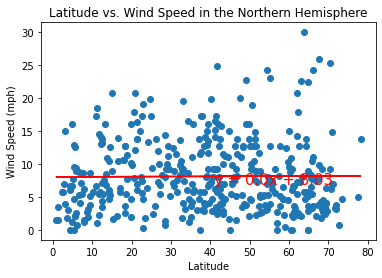

None


In [50]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title('Latitude vs. Wind Speed in the Northern Hemisphere')
print(linear_reg_plot(x_values, y_values))

There is no correlation between latitude and wind speed for the northern hemisphere. Most countries in the northern hemisphere have moderate to low wind speeds. 

The r-squared is: -0.39716989402589803


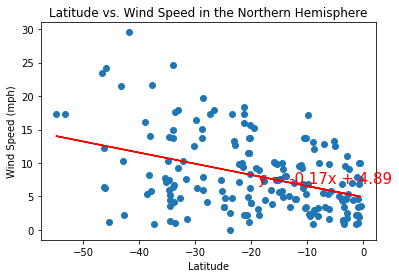

None


In [51]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.title('Latitude vs. Wind Speed in the Northern Hemisphere')
print(linear_reg_plot(x_values, y_values))

The data for wind speeds in the southern hemisphere demonstrates that as a country nears the equator, wind speeds decrease. 